<a href="https://colab.research.google.com/github/anurag22th/ML_Projects/blob/main/Spam_sms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [79]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [80]:
df.shape

(5572, 5)

In [81]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


**DATA CLEANING**

In [83]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True) # removed uselss clmn

In [84]:
df.sample(20)

,v1,v2
402,ham,The hair cream has not been shipped.
3740,spam,2/2 146tf150p
1550,ham,He says hi and to get your ass back to south t...
1522,ham,I thk u dun haf 2 hint in e forum already lor....
2507,ham,Yup...
4229,ham,And several to you sir.
2090,ham,S:-)kallis wont play in first two odi:-)
4527,ham,HOW ARE U? I HAVE MISSED U! I HAVENT BEEN UP 2...
4819,spam,Check Out Choose Your Babe Videos @ sms.shsex....
1057,ham,Ard 515 like dat. Y?


In [85]:
df.rename(columns={'v1': 'target', 'v2': 'txt'}, inplace=True)# renaming
df.sample(5)

,target,txt
3367,ham,"Hey elaine, is today's meeting still on?"
4502,ham,Stupid.its not possible
2867,ham,"Aight, tomorrow around &lt;#&gt; it is"
3299,ham,Just do what ever is easier for you
5198,ham,She.s fine. I have had difficulties with her p...


In [86]:
df.target.replace({'ham':'0','spam':'1'}, inplace=True) # replace ham and spam with 0,1

In [87]:
df.sample(5)

,target,txt
3128,0,"Haha better late than ever, any way I could sw..."
1474,0,"Friendship is not a game to play, It is not a ..."
3474,0,"Night has ended for another day, morning has c..."
5369,0,Hi mom we might be back later than &lt;#&gt;
1909,0,Then u going ikea str aft dat?


In [88]:
# missing val
df.isnull().sum() # .sum() gives us no.

target    0
txt       0
dtype: int64

In [89]:
# duplicate val
df.duplicated().sum()

403

In [90]:
# remove duplicate
df = df.drop_duplicates(keep='first')

In [91]:
df.shape

(5169, 2)

**EDA**

In [92]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [93]:
import nltk
from nltk.corpus import stopwords
import string # for punctuation

In [94]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [95]:
df['txt'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: txt, Length: 5169, dtype: int64

In [96]:
df['num_char'] = df['txt'].apply(len)

In [97]:
df.sample(5)

,target,txt,num_char
987,0,"Geeee ... I miss you already, you know ? Your ...",145
5009,0,"By the way, 'rencontre' is to meet again. Moun...",60
5513,0,Yes. Please leave at &lt;#&gt; . So that at ...,69
562,0,Geeeee ... I love you so much I can barely sta...,51
4748,0,Thanx u darlin!im cool thanx. A few bday drink...,91


In [98]:
# words
df['num_wrd'] = df['txt'].apply(lambda x: len(nltk.word_tokenize(x)) )

In [99]:
df.sample(10)

,target,txt,num_char,num_wrd
2125,0,"Sorry im getting up now, feel really bad- tota...",79,16
2414,0,O was not into fps then.,24,7
2893,0,K...k...yesterday i was in cbe .,32,10
2917,0,Thanks chikku..:-) gud nyt:-*,29,11
5130,0,Any way where are you and what doing.,37,9
2314,0,Also that chat was awesome but don't make it r...,85,18
2792,0,Not from this campus. Are you in the library?,45,11
3107,0,Hello hun how ru? Its here by the way. Im good...,149,39
1676,0,"Yeah, that's fine! It's å£6 to get in, is that...",51,17
3131,0,I've been barred from all B and Q stores for l...,155,39


In [100]:
df['num_sent'] = df['txt'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.sample(5)

,target,txt,num_char,num_wrd,num_sent
1211,0,Ok then i will come to ur home after half an hour,49,12,1
2873,0,Crucify is c not s. You should have told me ea...,52,12,1
5411,0,I ask if u meeting da ge tmr nite...,36,10,1
1621,0,Living is very simple.. Loving is also simple....,148,34,4
190,1,Are you unique enough? Find out from 30th Augu...,72,12,3


In [101]:
df[['num_char', 'num_wrd','num_sent']].describe()

,num_char,num_wrd,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

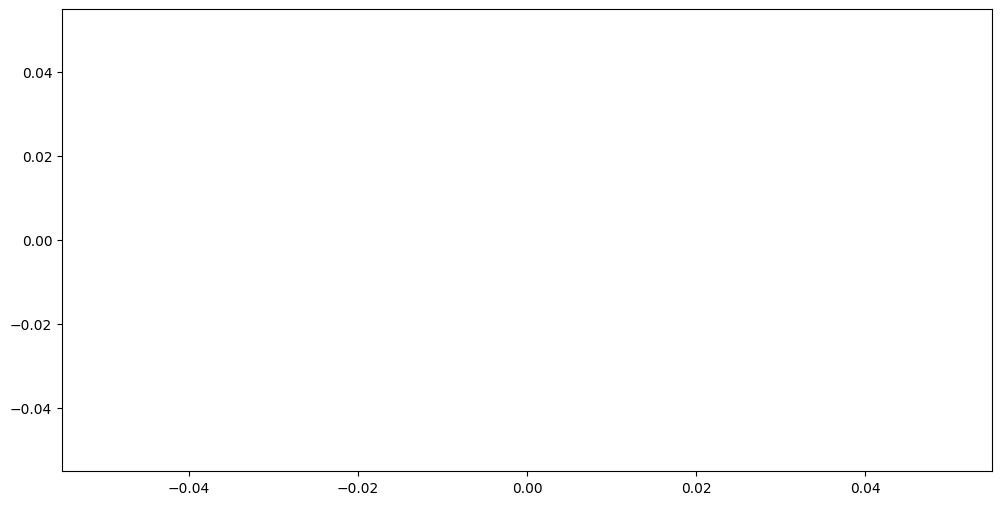

In [103]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_char'])
sns.histplot(df[df['target'] == 1]['num_char'],color='red')

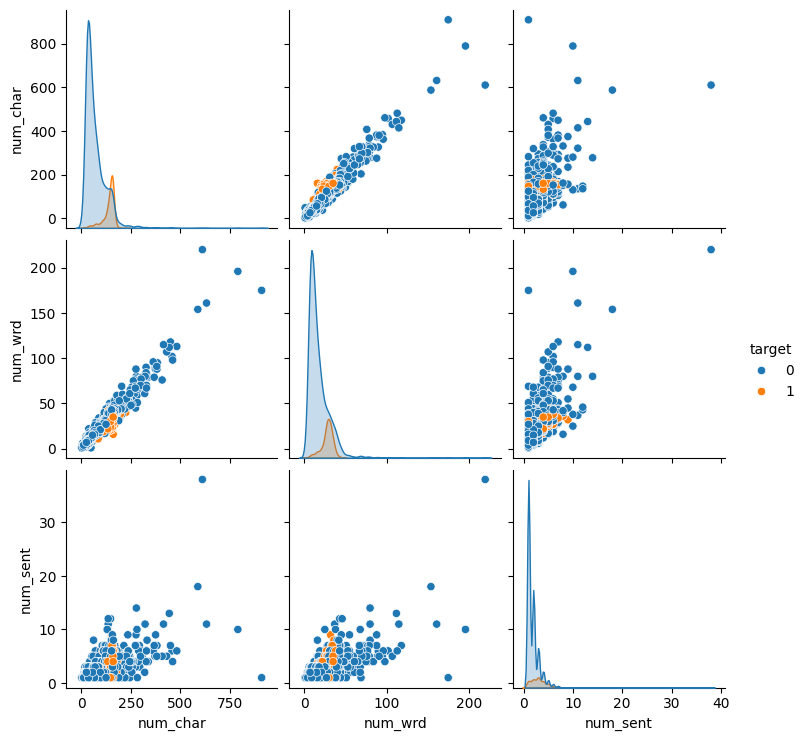

In [104]:
sns.pairplot(df,hue='target')

<ipython-input-105-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

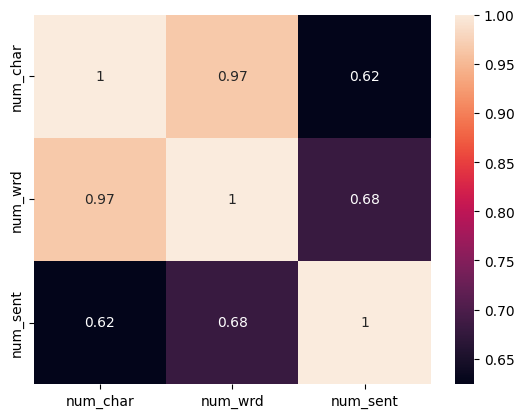

In [105]:
sns.heatmap(df.corr(),annot=True)

**DATA PREPROCESSING**

In [106]:
# lower txt , tokenize, remove spl characters, remove stop words, stemming

def transform_text(text) :
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text :
    if i.isalnum():
      y.append(i)
  text =y[:]
  y.clear()

  for i in text :
    if i not in stopwords.words('english') and i not in string.punctuation :
      y.append(i)

  text = y[:]
  y.clear()

  for i in text :
    y.append(ps.stem(i))
  return " ".join(y)



In [107]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [108]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [109]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')


'love'

In [110]:
transform_text('ANURAG! PAR2@EEK%')

'anurag par2 eek'

In [111]:
df['transformed_text'] = df['txt'].apply(transform_text)

In [112]:
df.head()

,target,txt,num_char,num_wrd,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
!pip install wordcloud

In [ ]:
!pip install wordCloud

In [ ]:
!/usr/bin/python3 -m pip install wordcloud

In [113]:
import sys
print(sys.executable)

/usr/bin/python3


In [78]:
import wordcloud
from wordcloud import wordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

ImportError: cannot import name 'wordCloud' from 'wordcloud' (/usr/local/lib/python3.10/dist-packages/wordcloud/__init__.py)

In [114]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

NameError: name 'wc' is not defined

In [115]:
df.head()

,target,txt,num_char,num_wrd,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [116]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [117]:
len(spam_corpus)

0

In [118]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

KeyError: 0

In [119]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [120]:
len(ham_corpus)

0

**MODEL BUILDING**

In [121]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [123]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [127]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [125]:
X.shape

(5169, 3000)

In [126]:
y = df['target'].values

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [130]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [131]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [133]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))


0.8694390715667312
[[788 108]
 [ 27 111]]


In [137]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]


In [141]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]


In [ ]:
# tfidf --> MNB

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [143]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [144]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [148]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)

    return accuracy

In [149]:
train_classifier(svc,X_train,y_train,X_test,y_test)

0.9758220502901354

In [ ]:
accuracy_scores = []

for name,clf in clfs.items():

    current_accuracy = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)

    accuracy_scores.append(current_accuracy)